In [1]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv("Housing.csv")
print(data)

        price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no   

    hotwaterheating aircond

In [3]:
price = data['price'].values.reshape(-1,1)

In [4]:
facility_data = data.iloc[:, 1:].to_numpy()
facility_data = np.where(facility_data == 'yes', 1, facility_data)
facility_data = np.where(facility_data == 'no', 0, facility_data)
facility_data = np.where(facility_data == 'furnished', 2, facility_data)
facility_data = np.where(facility_data == 'semi-furnished', 1, facility_data)
facility_data = np.where(facility_data == 'unfurnished', 0, facility_data)

In [5]:
X_train, X_temp, y_train, y_temp = train_test_split(facility_data, price, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
iters = 1000
rate = 0.09

In [7]:
model = MLPRegressor(hidden_layer_sizes=(512,),max_iter=iters,learning_rate_init=rate,activation='relu',solver='adam',verbose=True,batch_size=32)
history = model.fit(X_train,y_train)
print(len(history.loss_curve_))

c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1771: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 12909562136454.54101562
Iteration 2, loss = 12897064143397.30273438
Iteration 3, loss = 12864512562673.65429688
Iteration 4, loss = 12802569753253.32617188
Iteration 5, loss = 12711406626488.23632812
Iteration 6, loss = 12578323062609.09960938
Iteration 7, loss = 12410651530090.21093750
Iteration 8, loss = 12209976067515.63476562
Iteration 9, loss = 11967149814189.49023438
Iteration 10, loss = 11689634265284.31835938
Iteration 11, loss = 11383142138133.07617188
Iteration 12, loss = 11047679234873.27734375
Iteration 13, loss = 10687478247586.79687500
Iteration 14, loss = 10304858562757.37695312
Iteration 15, loss = 9890051342908.52734375
Iteration 16, loss = 9482038359775.74414062
Iteration 17, loss = 9053012725264.46679688
Iteration 18, loss = 8615659811276.16015625
Iteration 19, loss = 8176888057011.39746094
Iteration 20, loss = 7737138370727.83593750
Iteration 21, loss = 7305971303319.72167969
Iteration 22, loss = 6879760191707.53515625
Iteration 23, loss = 646107

c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


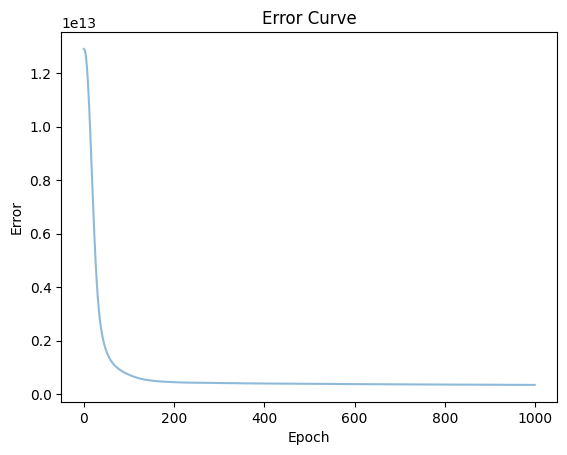

In [8]:
import matplotlib.pyplot as plt
#plt.scatter(range(1,iters+1), history.loss_curve_, alpha=0.5)
plt.plot(history.loss_curve_, alpha=0.5)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.title('Error Curve')
plt.show()

In [9]:
def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    return np.mean((y - y_pred) ** 2)

mse_val = evaluate_model(model, X_val, y_val)
mse_test = evaluate_model(model, X_test, y_test)

print(f'Validation MSE: {mse_val**0.5:.4f}')
print(f'Test MSE: {mse_test**0.5:.4f}')

Validation MSE: 3852715997.2976
Test MSE: 2678577.8698


In [10]:
mse_train = evaluate_model(model, X_train, y_train)
print(f'Training MSE: {mse_train**0.5:.4f}')

Training MSE: 2333307.2246


In [11]:
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

In [12]:
pltYPred = []
pltYVal = []
trueChange = []

pltYTestPred = []
pltYTest = []
testChange = []

In [13]:
for i in range(len(y_val_pred)):
  pltYPred.append(y_val_pred[i])
  pltYVal.append(y_val[i][0])
  trueChange.append(y_val_pred[i] - y_val[i][0])

In [16]:
for i in range(len(y_test_pred)):
  pltYTestPred.append(y_test_pred[i])
  pltYTest.append(y_test[i][0])
  testChange.append(y_test_pred[i] - y_test[i][0])

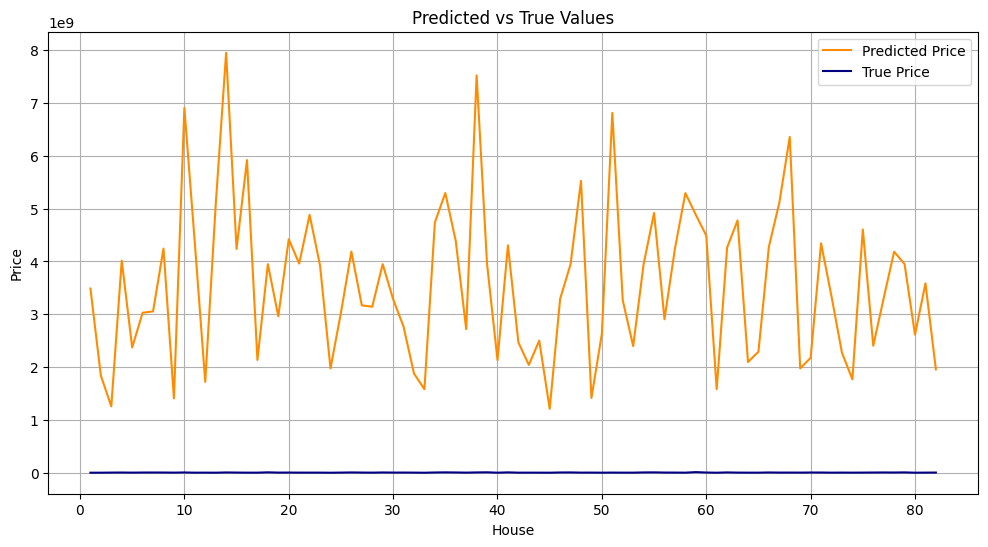

In [17]:
plt.figure(figsize=(12, 6))
plt.title("Predicted vs True Values")
plt.xlabel("House")
plt.ylabel("Price")
valRange = range(1, len(pltYPred)+1)
plt.plot(valRange, pltYPred, label="Predicted Price", color="darkorange")

plt.plot(valRange, pltYVal, label="True Price",
             color="navy")

plt.legend(loc="best")
plt.grid(True)
plt.show()

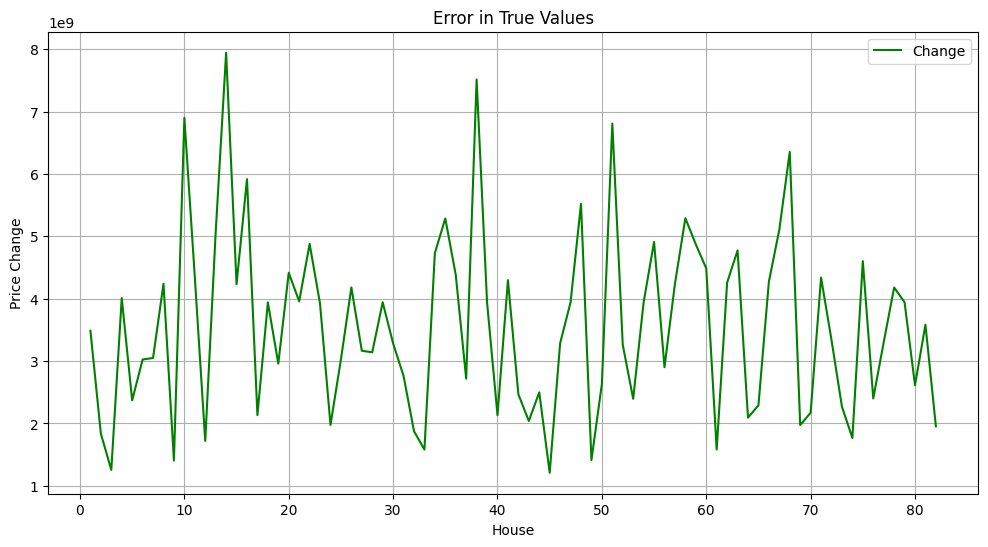

In [18]:
plt.figure(figsize=(12, 6))
plt.title("Error in True Values")
plt.xlabel("House")
plt.ylabel("Price Change")
plt.plot(valRange, trueChange, label="Change",
             color="green")

plt.legend(loc="best")
plt.grid(True)
plt.show()

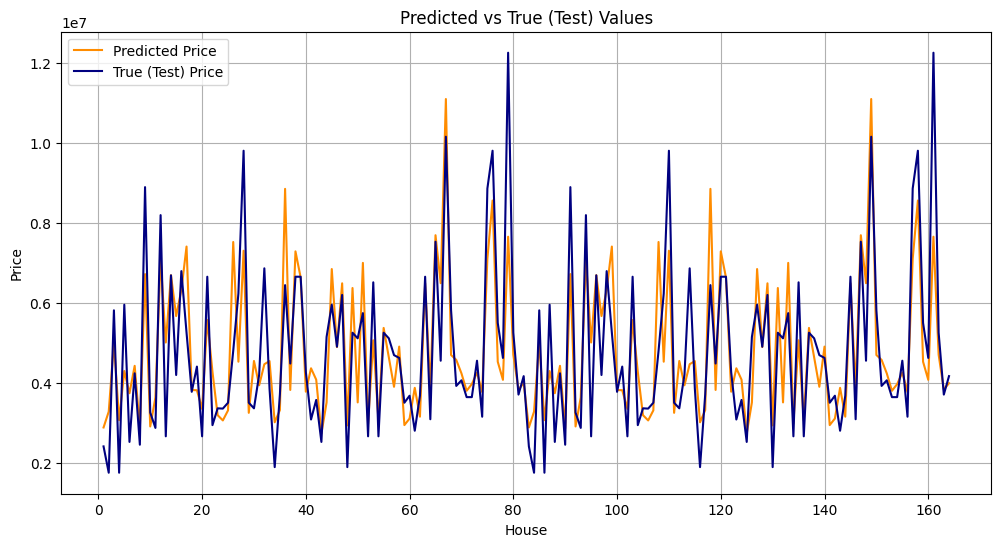

In [19]:
plt.figure(figsize=(12, 6))
plt.title("Predicted vs True (Test) Values")
plt.xlabel("House")
plt.ylabel("Price")
testRange = range(1, len(pltYTestPred)+1)
plt.plot(testRange, pltYTestPred, label="Predicted Price", color="darkorange")

plt.plot(testRange, pltYTest, label="True (Test) Price",
             color="navy")

plt.legend(loc="best")
plt.grid(True)
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
plt.title("Error in Test Values")
plt.xlabel("House")
plt.ylabel("Price Change")

plt.plot(testRange, testChange, label="Change",
             color="green")

plt.legend(loc="best")
plt.grid(True)
plt.show()